# Régression Linéaire Multiple

## 1- Préparation du dataset

###  a. Chargement du dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



#chargement du dataset:
dataset = pd.read_csv('Advertising.csv')
dataset

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
dataset.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [4]:
#chercher les valeurs nulls:

dataset.isnull().values.sum()

0

In [5]:
#suppression des valeurs nulls:
dataset.dropna(axis=0, how='any', inplace=True)
dataset.isnull().values.sum()

0

### c- Séparation des colonnes en target et features

In [6]:
#séparation des variables "features" et "target":

features = dataset[dataset.iloc[:, :3].columns.tolist()]
features.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [7]:
features.describe()

,TV,Radio,Newspaper
count,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000
std,85.854236,14.846809,21.778621
min,0.700000,0.000000,0.300000
25%,74.375000,9.975000,12.750000
50%,149.750000,22.900000,25.750000
75%,218.825000,36.525000,45.100000
max,296.400000,49.600000,114.000000


In [8]:
target = dataset[[dataset.iloc[:, 3].name]]
target.head()

,Sales
0,22.1
1,10.4
2,12.0
3,16.5
4,17.9


### d- Division des features et target en jeu de test et jeu de d'entrainement

In [9]:
x_train, x_test, y_train, y_test =  train_test_split(features, target, test_size=0.2, random_state=42)

print('x_train shape  : ', x_train.shape)
print('x_test shape  : ', x_test.shape)
print('y_train shape  : ', y_train.shape)
print('y_test shape  : ', y_test.shape)

x_train shape  :  (160, 3)
x_test shape  :  (40, 3)
y_train shape  :  (160, 1)
y_test shape  :  (40, 1)


In [10]:
x_train.head()

,TV,Radio,Newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6


In [11]:
x_train.describe()

,TV,Radio,Newspaper
count,160.000000,160.000000,160.000000
mean,150.019375,22.875625,29.945625
std,84.418857,14.805216,20.336449
min,0.700000,0.000000,0.300000
25%,77.750000,9.825000,12.875000
50%,150.650000,21.200000,25.600000
75%,218.825000,36.425000,44.500000
max,296.400000,49.600000,100.900000


In [12]:
x_test.head()

,TV,Radio,Newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2


In [13]:
x_train.mean()

TV           150.019375
Radio         22.875625
Newspaper     29.945625
dtype: float64

In [14]:
y_train.head()

,Sales
79,11.0
197,14.8
38,10.1
24,9.7
122,16.6


In [15]:
y_test.head()

,Sales
95,16.9
15,22.4
30,21.4
158,7.3
128,24.7


### e- Normalisation des features
Normaliser les features pour qu'ils varient sur une même échelle. Il y a trois techniques pour la normalisation:<br>
1. La mise à l'échelle des caractéristiques consiste essentiellement à diviser chaque caractéristique positive par sa valeur maximale, ou plus généralement, à rééchelonner chaque caractéristique en utilisant la formule **(x-min)/(max-min)**, où x est la valeur de la caractéristique. Les deux méthodes normalisent les caractéristiques dans la plage de 0 à 1, la première méthode étant adaptée aux caractéristiques positives, et la seconde méthode étant applicable à toutes les caractéristiques.<br><br>
2. **La normalisation par la moyenne**, également appelée centration des données, est une technique de mise à l'échelle des caractéristiques. Elle consiste à soustraire la moyenne de chaque valeur de caractéristique, de sorte que les données aient une moyenne égale à zéro. Mathématiquement, cela peut être exprimé comme suit pour une caractéristique 

 $x_i := \dfrac{x_i - \mu_i}{max - min} $ <br> <br>
3. **La normalisation Z-score**, également appelée standardisation, est une méthode de mise à l'échelle des caractéristiques. Elle consiste à transformer les données de telle sorte qu'elles aient une moyenne de 0 et un écart type de 1. Mathématiquement, pour une caractéristique x, la normalisation Z-score est calculée comme suit :

$$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j} \tag{4}$$ <br>

où $j$ séléctionne une caractéristique ou une colonne de la matrice $\mathbf{X}$. $µ_j$ est la moyenne de toutes les valeurs de la caractéristique (j) et $\sigma_j$ est la déviation standard de la caractéristique (j).
$$
\begin{align}
\mu_j &= \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j \tag{5}\\
\sigma^2_j &= \frac{1}{m} \sum_{i=0}^{m-1} (x^{(i)}_j - \mu_j)^2  \tag{6}
\end{align}
$$

In [16]:
def z_score_normalization(data):
    """
    Normalise les caractéristiques d'un ensemble de données en utilisant la méthode Z-score.

    Args:
    - data : un tableau NumPy contenant les données à normaliser. Chaque colonne représente une caractéristique.

    Returns:
    - data_normalized : le tableau NumPy contenant les données normalisées.
    - mean : le tableau NumPy contenant les moyennes de chaque caractéristique avant normalisation.
    - std : le tableau NumPy contenant les déviations standard de chaque caractéristique avant normalisation.
    """
    # Calcul des moyennes et des déviations standard de chaque caractéristique
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)

    # Normalisation des données en utilisant la méthode Z-score
    data_normalized = (data - mean) / std

    return data_normalized, mean, std

In [17]:
x_train_norm, mean,std=z_score_normalization(x_train)
x_train_norm
#x_train_norm= (x_train - x_train.mean())/x_train.std()

,TV,Radio,Newspaper
79,-0.404248,-1.028237,-0.337675
197,0.320608,-0.919828,-1.161439
38,-1.270511,0.259124,0.254251
24,-1.042359,-0.696233,-0.574446
122,0.879103,-1.387343,-0.707629
...,...,...,...
106,-1.485591,-0.804643,-0.012116
14,0.642634,0.679210,0.791917
92,0.804241,0.719863,1.433170
179,0.185143,-0.872399,-0.608975


In [18]:
x_train_norm.mean()

TV          -2.942091e-16
Radio       -2.081668e-16
Newspaper    1.665335e-17
dtype: float64

In [19]:
x_train_norm.std()

TV           1.00314
Radio        1.00314
Newspaper    1.00314
dtype: float64

In [20]:
mean


TV           150.019375
Radio         22.875625
Newspaper     29.945625
dtype: float64

In [21]:
std

TV           84.154634
Radio        14.758878
Newspaper    20.272798
dtype: float64

In [22]:
# Normalization de x_test
x_test_norm= (x_test - mean)/std
x_test_norm.head()

,TV,Radio,Newspaper
95,0.157812,0.591127,1.132275
15,0.539253,1.681996,1.132275
30,1.697834,0.367533,0.653801
158,-1.643633,0.950233,0.752455
128,0.835137,1.770079,-1.319286


### 2- Construction de X, Theta et Y

In [23]:
#x train:
X_train_norm_1 = np.hstack((x_train_norm, np.ones((x_train.shape[0], 1))))
# X_train_norm_1

In [24]:
X_test_norm_1 = np.hstack((x_test_norm, np.ones((x_test.shape[0], 1))))
# X_test_norm_1

In [25]:
Y_train = y_train.values
# Y_train

In [26]:
Y_test = y_test.values
# Y_test

In [27]:
#construction aléatoire de Theta initial:
np.random.seed(0)

theta = np.random.randn(X_train_norm_1.shape[1], 1)
theta

array([[1.76405235],
       [0.40015721],
       [0.97873798],
       [2.2408932 ]])

### 4- Définition et entraînemet du modèle

In [28]:
def model(X, theta): # définir le modèle
    return X.dot(theta)

def cost_function(X, y, theta): #définir la fonction coût
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

cost_function(X_train_norm_1, Y_train ,theta)

91.72522545503882

In [29]:
# définir la fonction de gradient
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)
# Définir la descente de gradient
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

In [40]:
#entrainement:
theta_final, cost_h = gradient_descent(X_train_norm_1, Y_train, theta, learning_rate=1, n_iterations=3)

theta_final

array([[ 4.59587732],
       [ 1.46091861],
       [ 0.16056271],
       [15.330625  ]])

#### courbe d'apprentissage

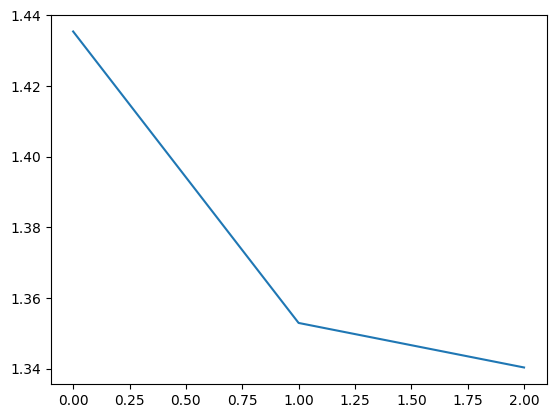

In [41]:
plt.plot(range(3), cost_h)
plt.show()

In [32]:
# Evaluation du modèle
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

coef_determination(Y_test, model(X_test_norm_1,theta_final))

-1.7844913228505144

#### Tester des prédictions

In [33]:
predictions=model(X_test_norm_1, theta_final)


In [34]:
print("Le prix prédit du premier bien du dataset de test est", predictions[0])

Le prix prédit du premier bien du dataset de test est [7.53761812]


In [35]:
print("Le prix réel du premier bien du dataset de test est",Y_test[0])

Le prix réel du premier bien du dataset de test est [16.9]


In [36]:
print("La marge d'erreur commise est",model(X_test_norm_1, theta_final)[0]-Y_test[0])

La marge d'erreur commise est [-9.36238188]


# Comparaison

In [37]:
object= StandardScaler()


# standardization 
scale = object.fit_transform(x_train) 
print(scale)


[[-4.04248386e-01 -1.02823707e+00 -3.37675384e-01]
 [ 3.20607716e-01 -9.19827737e-01 -1.16143931e+00]
 [-1.27051084e+00  2.59123702e-01  2.54250789e-01]
 [-1.04235941e+00 -6.96233499e-01 -5.74445854e-01]
 [ 8.79103401e-01 -1.38734296e+00 -7.07629243e-01]
 [-1.32873699e+00 -1.29926038e+00 -7.96418169e-01]
 [-9.43731452e-01 -4.65863678e-01  5.35415722e-01]
 [-3.23140256e-02  6.94073782e-02 -5.34984109e-01]
 [-5.39713297e-01 -1.16374872e+00  2.19721762e-01]
 [-8.75998996e-01  3.13328366e-01 -6.87898371e-01]
 [-8.53421511e-01  1.62101588e+00  2.24654481e-01]
 [ 2.18414888e-01 -1.06889056e+00 -8.45745350e-01]
 [-1.67928215e+00  1.76330312e+00  2.22240532e+00]
 [-1.68997675e+00  1.08574483e+00  1.01882210e+00]
 [-8.74810708e-01 -1.49575229e+00 -7.47090988e-01]
 [-2.45017701e-01 -1.16374872e+00  6.68075010e-02]
 [-9.10459368e-01 -3.98107848e-01 -8.40812632e-01]
 [ 1.65980907e+00  1.31611465e+00  1.04841841e+00]
 [-1.54975868e+00 -1.88064775e-01 -6.38571189e-01]
 [ 5.65395186e-01 -1.31281155e+